# แยกรูปภาพ หมา-แมว

In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy  as np
import tqdm
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , BatchNormalization , Dropout , Flatten
from sklearn.metrics import *
import matplotlib.pyplot as plt

### นำเข้ารูปภาพ

In [2]:
data_path = './cat_dog/'

train_path = os.path.join(data_path , 'train')
validation_path = os.path.join(data_path , "validation")
test_path = os.path.join(data_path , 'test')


In [3]:
train_data_gen = ImageDataGenerator(rescale=1/255.0)
validation_data_gen = ImageDataGenerator(rescale=1/255.0)
test_data_gen = ImageDataGenerator(rescale=1/255.0)

### แบ่งจำนวนรูปภาพเป็น 3 ส่วน training validation testing

In [4]:
train_gen = train_data_gen.flow_from_directory(train_path , target_size=(128,128) , batch_size=128 , class_mode='binary')
validation_gen = validation_data_gen.flow_from_directory(validation_path , target_size=(128,128) , batch_size=128 , class_mode='binary')
test_gen = test_data_gen.flow_from_directory(test_path , target_size=(128,128) , batch_size=128 , class_mode='binary' , shuffle=False)

Found 5000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
type(train_gen)

keras_preprocessing.image.directory_iterator.DirectoryIterator

### แสดงรูปภาพ class 0 = แมว  , class 1 = หมา

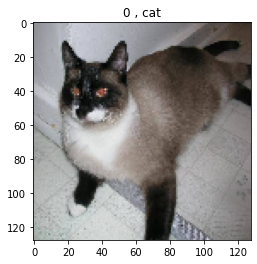

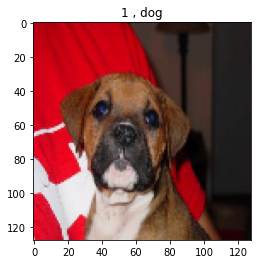

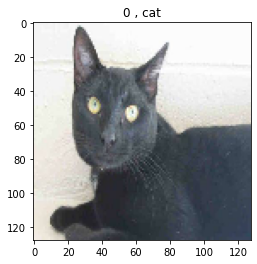

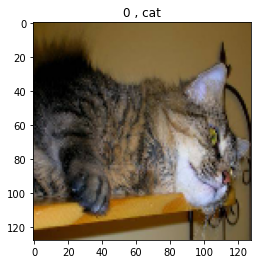

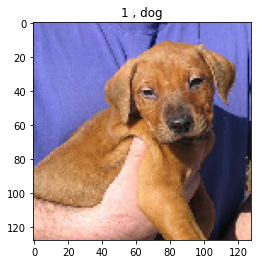

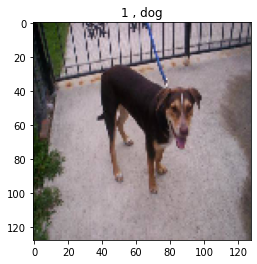

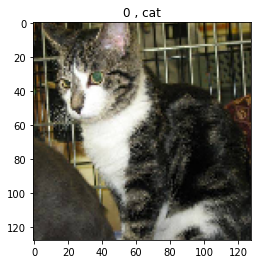

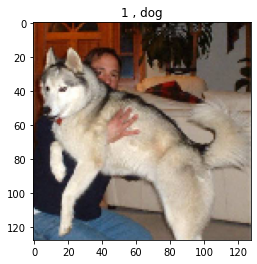

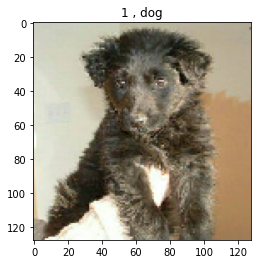

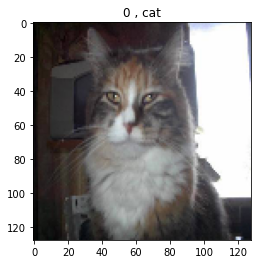

In [8]:
for i in range(1,11) :
    plt.imshow(train_gen[0][0][i])    
    plt.title(f"{int(train_gen[0][1][i])} , {'cat' if int(train_gen[0][1][i]) == 0 else 'dog'}")
    plt.show()

### สร้าง Convolutional Neural Network Model

In [9]:
class CNN(tf.keras.Model) :
    
    def __init__(self):
        super(CNN , self).__init__() 
        
        self.layer1 = Conv2D(32 , kernel_size=(3,3) , activation='relu')
        self.layer2 = BatchNormalization()
        self.layer3 = MaxPooling2D(pool_size=(2,2))
        self.layer4 = Dropout(0.25)
        
        self.layer5 = Conv2D(64 , kernel_size=(3,3) , activation='relu')
        self.layer6 = BatchNormalization()
        self.layer7 = MaxPooling2D(pool_size=(2,2))
        self.layer8 = Dropout(0.25)     

        self.layer9 = Flatten()
        
        self.layer10 = Dense(128 , activation='relu')
        self.layer11 = BatchNormalization()
        self.layer12 = Dropout(0.5)
            
        self.classifier = Dense(2 , activation='softmax')

    
    def call(self , x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.layer7(x)
        x = self.layer8(x)
        x = self.layer9(x)
        x = self.layer10(x)
        x = self.layer11(x)
        x = self.layer12(x)
           
        return  self.classifier(x)
        
        

In [10]:
model  =CNN()

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [12]:
model.fit(train_gen , verbose=1 , epochs=10, validation_data=validation_gen)

  ...
    to  
  ['...']
Train for 40 steps, validate for 8 steps
Epoch 1/10
40/40 [==============================] - 59s 1s/step - loss: 1.0192 - accuracy: 0.5900 - val_loss: 1.9659 - val_accuracy: 0.5000
Epoch 2/10
40/40 [==============================] - 50s 1s/step - loss: 0.7074 - accuracy: 0.6636 - val_loss: 2.7449 - val_accuracy: 0.5010
Epoch 3/10
40/40 [==============================] - 50s 1s/step - loss: 0.5959 - accuracy: 0.7186 - val_loss: 2.3045 - val_accuracy: 0.5000
Epoch 4/10
40/40 [==============================] - 50s 1s/step - loss: 0.5022 - accuracy: 0.7608 - val_loss: 1.2396 - val_accuracy: 0.5020
Epoch 5/10
40/40 [==============================] - 50s 1s/step - loss: 0.5034 - accuracy: 0.7602 - val_loss: 3.1882 - val_accuracy: 0.5000
Epoch 6/10
40/40 [==============================] - 50s 1s/step - loss: 0.4456 - accuracy: 0.7918 - val_loss: 3.1109 - val_accuracy: 0.5010
Epoch 7/10
40/40 [==============================] - 50s 1s/step - loss: 0.4163 - accuracy: 0.8

In [13]:
prediction = model.predict(test_gen)

In [14]:
class_prediction = np.argmax(prediction , axis=1)

In [15]:
class_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [16]:
test_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
confusion_matrix(class_prediction , test_gen.classes)

array([[10,  8],
       [ 0,  2]], dtype=int64)

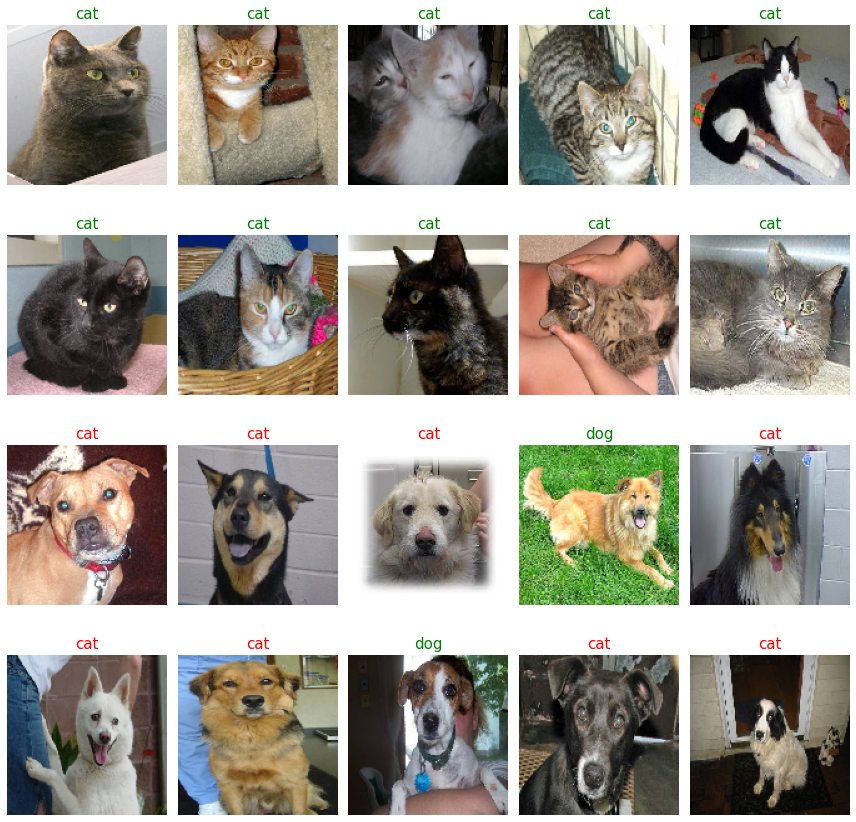

In [18]:
fig , ax = plt.subplots(4,5 , figsize=(12,12) , sharex=True , sharey=True)
ax = ax.ravel()

for i in range(0,20) :
    ax[i].imshow(test_gen[0][0][i])    
    ax[i].set_title(f"{'cat' if class_prediction[i] ==0 else 'dog' }" , color='g' if class_prediction[i] == test_gen.classes[i] else 'r' , fontsize=15 )
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### Model ทำนายผิดไป 8 ภาพ

### Model ยังไม่ดีเท่าไหร่ งั้นลองทำการ Transfer ดู

In [19]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3) , 
                                  include_top=False , weights='imagenet')

In [20]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

### ทำการปิด ไม่ให้ train layer ด้านบน

In [21]:
base_model.trainable = False

In [22]:
layer_1 = tf.keras.layers.Flatten()(base_model.output)
layer_2 = tf.keras.layers.Dropout(0.5)(layer_1)
predict_layer = tf.keras.layers.Dense(2 , activation='softmax')(layer_2)

### ต่อ MobileNetV2 กับ output ที่สร้าง

In [23]:
model_transfer = tf.keras.Model(inputs=base_model.input , outputs=predict_layer)

In [24]:
model_transfer.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
______________________________________________________________________________________________

In [25]:
model_transfer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Transfer Model Training

In [26]:
model_transfer.fit(train_gen , verbose=1 , epochs=10, validation_data=validation_gen)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 40 steps, validate for 8 steps
Epoch 1/10
40/40 [==============================] - 51s 1s/step - loss: 0.4417 - accuracy: 0.8916 - val_loss: 0.5405 - val_accuracy: 0.9310
Epoch 2/10
40/40 [==============================] - 37s 918ms/step - loss: 0.1723 - accuracy: 0.9518 - val_loss: 0.6994 - val_accuracy: 0.9140
Epoch 3/10
40/40 [==============================] - 37s 920ms/step - loss: 0.1090 - accuracy: 0.9680 - val_loss: 0.4984 - val_accuracy: 0.9350
Epoch 4/10
40/40 [==============================] - 37s 919ms/step - loss: 0.0606 - accuracy: 0.9808 - val_loss: 0.5246 - val_accuracy: 0.9340
Epoch 5/10
40/40 [==============================] - 37s 920ms/step - loss: 0.0548 - accuracy: 0.9832 - val_loss: 0.4900 - val_accuracy: 0.9360
Epoch 6/10
40/40 [==============================] - 37s 919ms/step - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.4633 - val_accuracy: 0.9410
Epoch 7/10
40/40 [==============================] - 37

In [27]:
prediction = model_transfer.predict(test_gen)

In [28]:
class_prediction = np.argmax(prediction , axis=1)

In [29]:
class_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [30]:
test_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
confusion_matrix(class_prediction , test_gen.classes)

array([[10,  2],
       [ 0,  8]], dtype=int64)

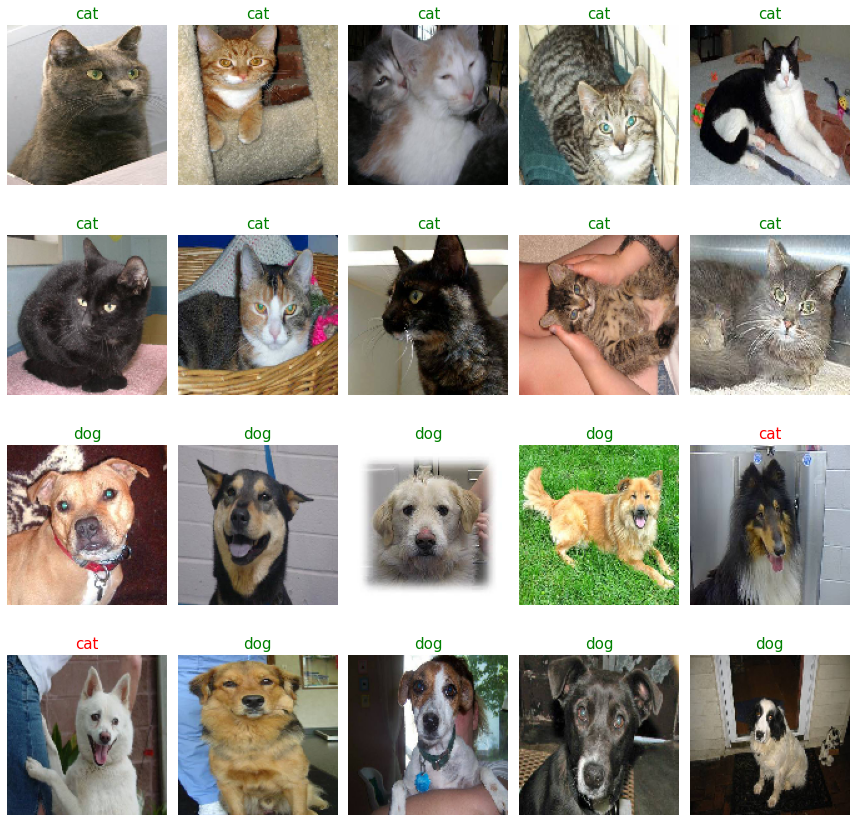

In [32]:
fig , ax = plt.subplots(4,5 , figsize=(12,12) , sharex=True , sharey=True)
ax = ax.ravel()

for i in range(0,20) :
    ax[i].imshow(test_gen[0][0][i])    
    ax[i].set_title(f"{'cat' if class_prediction[i] ==0 else 'dog' }" , color='g' if class_prediction[i] == test_gen.classes[i] else 'r' , fontsize=15 )
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### Transfer Model ทำนายผิดไปแค่ 2 ภาพ

In [85]:
model_transfer.save('cat_dog_cnn.h5')

In [86]:
cat_dog_model = tf.keras.models.load_model('cat_dog_cnn.h5')

In [88]:
cat_dog_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
______________________________________________________________________________________________

In [142]:
sample_path = r"C:\Users\acer\jlab_training\cat_dog\test\3427.jpg"

In [166]:
sample_img = plt.imread(sample_path)

### ลองทำนายรูปภาพที่มีความซับซ้อนมากขึ้น (คน+หมา)

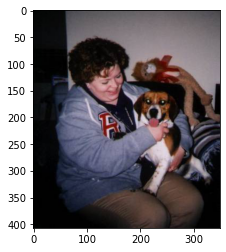

In [158]:
plt.imshow(sample_img)

In [163]:
sample_img.shape

(407, 349, 3)

In [173]:
import cv2 as cv

In [218]:
sample_img = cv.resize(sample_img , (128,128))

In [219]:
sample_img.shape

(128, 128, 3)

In [221]:
sample_img = sample_img.reshape(1,128,128,3)
sample_img.shape

(1, 128, 128, 3)

In [222]:
cat_dog_model.predict(sample_img)

array([[9.085649e-04, 9.990914e-01]], dtype=float32)

In [223]:
sample_predict = cat_dog_model.predict(sample_img)
class_sample_predict = np.argmax(sample_predict , axis=1)

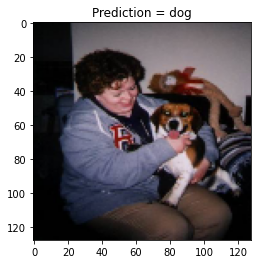

In [231]:
plt.imshow(sample_img.reshape(128,128,3))
plt.title(f"Prediction = {'cat' if int(class_sample_predict) == 0 else 'dog'}");

### Transfer Model ทำนายถูกต้อง